## This notebook is for studying HSC satellite streak width vs integrated flux.

Actually, considering that we have circular pupil, a out-of-focus point object will be seen as a donut. Convolving this "Point-Spread-Function" with the apparent shape of the satellite could give us a trail cross-section with a double peak structure.

Below we assume the apparent shape is a 2 x 2 m square.

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from LEOSat import getSatSIIvonK, getSatSII

In [2]:
#satellite parameters
l1 = 2 # 0.5 #2 #1.5 #meter
l2 = 2 #0.5 #2 #meter
h = 550e3

In [3]:
f=15
d=8.3
pixel_size = 15 #micron
plate_scale = 0.2
e = 1.2/8.3
seeing = 0.77  #this is for the zenith angle below
zangle = 62.063

In [4]:
vonk = 1

In [5]:
if not vonk:
    [sii, fwhm_exp] = getSatSII(f,d,e, l1, l2, h, zangle, seeing, pixel_size, plate_scale)
    plot_pixel_size = 1 #microns
else:
    [sii, fwhm_exp, plot_pixel_size] = getSatSIIvonK(f,d,e, l1, l2, h, zangle, seeing, pixel_size, plate_scale)

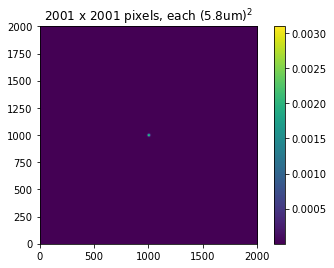

In [6]:
plt.imshow(sii, origin='lower')
plt.colorbar()
[n1, n2] = sii.shape
plt.title('%d x %d pixels, each (%.1fum)$^2$'%(n1,n2,plot_pixel_size));

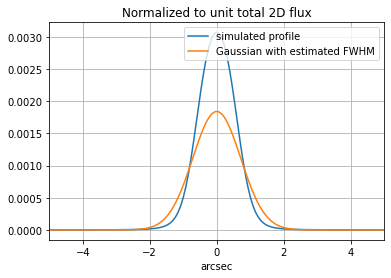

In [7]:
aa = sii[int(n1/2),:]
x1 = np.linspace(-(n1-1)/2, (n1-1)/2, n1)
x2 = np.linspace(-(n2-1)/2, (n2-1)/2, n2)
[x, y] = np.meshgrid(x2,x1)
r = np.sqrt(x**2+y**2)
pred = np.exp(-r**2/2/(fwhm_exp/2.355)**2)
pred = pred/np.sum(pred)
xp = x2*plot_pixel_size/pixel_size*plate_scale #display arcsec as x axis from now on
xpg = x2*1.0/pixel_size*plate_scale #pixel size on the Gaussian is 1um

#to make the two profiles comparable, we need to multiple by plot_pixel_size**2, 
#because 1 pixel in simulated profile corresponds to this number of pixels on the Gaussian
pred = pred*plot_pixel_size**2 

n_shift =  int((len(aa)-1)/2 - np.argmax(aa==max(aa)))
aa = np.roll(aa, n_shift)

plt.plot(xp, aa, label='simulated profile')
plt.plot(xpg, pred[int(n1/2),:], label='Gaussian with estimated FWHM')
plt.xlabel('arcsec')
plt.legend()
plt.title('Normalized to unit total 2D flux')
plt.grid()
if max(xp)>50: #50 arcsec
    plt.xlim([-5, 5])

In [8]:
### x axis, in arcseconds
r_real = np.array([ 0.   ,  0.168,  0.336,  0.504,  0.672,  0.84 ,  1.008,  1.176,
        1.344,  1.512,  1.68 ,  1.848,  2.016,  2.184,  2.352,  2.52 ,
        2.688,  2.856,  3.024,  3.192,  3.36 ,  3.528,  3.696,  3.864,
        4.032,  4.2  ,  4.368,  4.536,  4.704,  4.872,  5.04 ,  5.208,
        5.376,  5.544,  5.712,  5.88 ,  6.048,  6.216,  6.384,  6.552,
        6.72 ,  6.888,  7.056,  7.224,  7.392,  7.56 ,  7.728,  7.896,
        8.064,  8.232,  8.4  ,  8.568,  8.736,  8.904,  9.072,  9.24 ,
        9.408,  9.576,  9.744,  9.912, 10.08 , 10.248, 10.416, 10.584,
       10.752, 10.92 , 11.088, 11.256, 11.424, 11.592, 11.76 , 11.928,
       12.096, 12.264, 12.432, 12.6  , 12.768, 12.936, 13.104, 13.272,
       13.44 , 13.608, 13.776, 13.944, 14.112, 14.28 , 14.448, 14.616,
       14.784, 14.952, 15.12 , 15.288, 15.456, 15.624, 15.792, 15.96 ,
       16.128, 16.296, 16.464, 16.632, 16.8  , 16.968, 17.136, 17.304,
       17.472, 17.64 , 17.808, 17.976, 18.144, 18.312, 18.48 , 18.648,
       18.816, 18.984, 19.152, 19.32 , 19.488, 19.656, 19.824, 19.992,
       20.16 , 20.328, 20.496, 20.664, 20.832, 21.   , 21.168, 21.336,
       21.504, 21.672, 21.84 , 22.008, 22.176, 22.344, 22.512, 22.68 ,
       22.848, 23.016, 23.184, 23.352, 23.52 , 23.688, 23.856, 24.024,
       24.192, 24.36 , 24.528, 24.696, 24.864, 25.032, 25.2  , 25.368,
       25.536, 25.704, 25.872, 26.04 , 26.208, 26.376, 26.544, 26.712,
       26.88 , 27.048, 27.216, 27.384, 27.552, 27.72 , 27.888, 28.056,
       28.224, 28.392, 28.56 , 28.728, 28.896, 29.064, 29.232, 29.4  ,
       29.568, 29.736, 29.904, 30.072, 30.24 , 30.408, 30.576, 30.744,
       30.912, 31.08 , 31.248, 31.416, 31.584, 31.752, 31.92 , 32.088,
       32.256, 32.424, 32.592, 32.76 , 32.928, 33.096, 33.264, 33.432])

### y axis, in nanoJansky/pixel
y_real = np.array([-3.25346254e-02,  6.32710010e-03,  2.98761148e-02, -6.47172704e-03,
        3.30839381e-02,  3.02390121e-02, -1.12222061e-02, -9.74990278e-02,
       -9.67041254e-02, -8.00295174e-03,  6.77698627e-02,  4.08377424e-02,
        6.88093081e-02,  4.13731746e-02,  1.82490796e-02,  3.61287631e-02,
        2.69515365e-02, -2.99513340e-03,  2.49687340e-02,  1.21359248e-02,
        4.25570086e-03,  1.86415687e-02,  2.21011899e-02,  1.56092886e-02,
        2.57792547e-02,  2.74648611e-02, -1.45547651e-02, -7.12763891e-03,
        2.61248033e-02,  1.42276287e-03,  1.50272660e-02,  1.31322313e-02,
        1.20542441e-02,  1.03614312e-02,  1.79493669e-02,  4.69845533e-03,
        4.68838587e-03,  2.94127446e-02,  8.86097178e-03,  2.42265426e-02,
        2.39883363e-03,  5.42151928e-03,  1.51885040e-02,  4.06694189e-02,
       -6.96244463e-03, -1.79327242e-02,  4.26439196e-03,  3.39521244e-02,
        6.78228959e-03,  3.65940109e-03, -5.28009981e-03,  7.93564506e-03,
        2.80997902e-03,  6.28841296e-03,  7.34100118e-03,  2.25159675e-02,
        2.83756796e-02,  3.82423401e-04, -4.35040146e-03,  6.80026785e-03,
        1.03614274e-02,  3.99775505e-02,  1.16606336e-02,  3.28925997e-02,
        4.63267788e-02,  3.51335071e-02,  8.02470297e-02,  6.88456669e-02,
        6.26600236e-02,  7.70918876e-02,  7.41154999e-02,  9.55164507e-02,
        1.08746022e-01,  1.12730756e-01,  1.12285286e-01,  1.46459877e-01,
        1.55226871e-01,  1.82397485e-01,  2.12428167e-01,  2.55834877e-01,
        2.99549401e-01,  3.36422920e-01,  4.17729497e-01,  4.78310764e-01,
        5.75102568e-01,  7.01661944e-01,  8.75744343e-01,  1.13756919e+00,
        1.56476283e+00,  2.27248621e+00,  3.63123584e+00,  6.72764397e+00,
        1.38323574e+01,  2.65552673e+01,  3.90182457e+01,  4.60944214e+01,
        4.72438507e+01,  4.11907883e+01,  3.16326675e+01,  2.00707092e+01,
        1.05733700e+01,  5.28365755e+00,  2.91788840e+00,  1.80934310e+00,
        1.20110607e+00,  8.59996259e-01,  6.31611526e-01,  4.54435021e-01,
        3.42582285e-01,  2.35635713e-01,  2.01528028e-01,  1.63384974e-01,
        1.28085017e-01,  9.28383321e-02,  7.82092810e-02,  6.04303181e-02,
        2.96547282e-02,  1.40815172e-02,  3.39132585e-02,  3.38138789e-02,
        2.10784506e-02,  2.77683511e-03,  3.54971737e-03, -9.77983698e-03,
       -3.61286104e-04, -1.75604671e-02, -2.99438834e-05, -2.29168609e-02,
       -1.22544542e-03, -2.04956681e-02, -2.76629888e-02, -7.24225119e-03,
       -1.92750767e-02, -2.21080855e-02, -2.42295079e-02, -4.07475717e-02,
       -2.72495784e-02, -2.12809853e-02, -3.60974409e-02, -3.13211717e-02,
       -1.21011361e-02, -1.02724917e-02, -1.43568702e-02,  5.11275232e-03,
       -1.66785195e-02, -1.58181787e-03, -1.26300156e-02, -1.41862407e-02,
       -3.54459472e-02, -2.06250511e-02, -1.09426267e-02, -2.03230157e-02,
       -2.35277154e-02, -7.00347871e-03, -2.26483941e-02, -1.24677122e-02,
       -1.34137943e-02, -2.45444216e-02, -1.10782869e-02, -2.51639970e-02,
       -1.62684955e-02, -4.52213548e-02, -5.42713143e-02, -2.61910744e-02,
       -3.80557217e-02, -1.79089345e-02, -3.32630016e-02, -6.10049181e-02,
       -4.54642363e-02, -3.45455594e-02, -4.69696186e-02, -3.61093692e-02,
       -3.33695747e-02, -3.68575044e-02, -2.90985443e-02, -1.40139051e-02,
       -2.00174190e-02, -1.32690333e-02,  6.99310005e-03, -6.66023046e-03,
       -1.71946809e-02, -1.14771351e-03,  3.95747274e-03, -4.28643078e-04,
        1.65862683e-02, -1.85360275e-02,  2.45580524e-02,  9.84517857e-03,
        2.88956705e-02,  3.06754708e-02,  2.21441165e-02,  2.99695432e-02,
        1.95116755e-02,  1.90281551e-02,  2.80599780e-02,  2.52593271e-02,
        2.46676877e-02,  1.05234366e-02,  3.04447301e-02,  1.69165097e-02])
center_idx = np.argmax(y_real==max(y_real))
center_r = r_real[center_idx]-0.05
idx = abs(r_real - center_r)<3
y_real = y_real[idx]
r_real = r_real[idx]
r_real -= center_r
y_real = y_real/max(y_real)

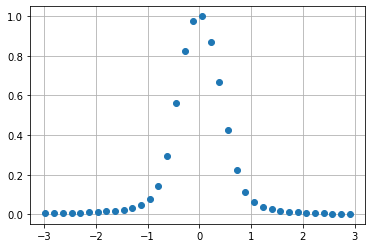

In [9]:
plt.plot(r_real, y_real,'o')
plt.grid()

(-3.0, 3.0)

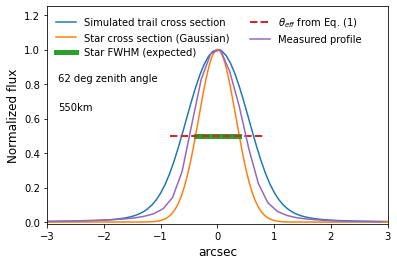

In [10]:
fig, ax = plt.subplots(figsize=(6.1,4))
aa =np.sum(sii,axis=0)
n_shift =  int((len(aa)-1)/2 - np.argmax(aa==max(aa)))
aa = np.roll(aa, n_shift)
plt.plot(xp, aa/np.max(aa),label='Simulated trail cross section');
#plt.plot(x2/pixel_size, np.sum(sii,axis=0),label='2m');
#plt.plot(x1/pixel_size, np.sum(sii,axis=1), label='1.5m'); #uncomment this if the apparent shape of LEOSat is not square, i.e, 1.5x2m
#plt.plot(x2/pixel_size, np.sum(pred,axis=0),label='pred');
#plt.plot([-fwhm_exp/pixel_size/2, fwhm_exp/pixel_size/2],[max(np.sum(pred,axis=0))/2, max(np.sum(pred,axis=0))/2])
s = np.exp(-x2**2/2/(seeing/plate_scale*pixel_size/2.355)**2)
plt.plot(xpg,s, label = 'Star cross section (Gaussian)')
plt.plot([-seeing/2, seeing/2],[0.5, 0.5], '-', linewidth = 5, label='Star FWHM (expected)')
plt.plot([-fwhm_exp/pixel_size*plate_scale/2, fwhm_exp/pixel_size*plate_scale/2],[0.5, 0.5],'--', linewidth = 2, 
         label=r'$\theta_{eff}$ from Eq. (1)')
plt.text(0.15, 0.62, "%.0f deg zenith angle"%zangle, color = 'black', transform=fig.transFigure)
plt.text(0.15, 0.52, "550km", color = 'black', transform=fig.transFigure)
plt.plot(r_real, y_real, label='Measured profile')
plt.legend(loc='upper left', framealpha=0., ncol = 2)
#plt.legend(fontsize=15, bbox_to_anchor=(0., 0.5, 0.5, 0.3), framealpha=0.)
#plt.grid()
plt.ylim([-0.01, 1.25])
plt.xlabel('arcsec', fontsize=12)
plt.ylabel('Normalized flux', fontsize=12)
plt.xlim([-3,3])
#plt.savefig('sat_profile.pdf')

In [11]:
print('seeing (at zenith angle = %.0f deg) = %.2f, estimated FWHM = %.2f'%(
    zangle, seeing, fwhm_exp/pixel_size*plate_scale))

seeing (at zenith angle = 62 deg) = 0.77, estimated FWHM = 1.69


In [12]:
print('airmass = %.2f'%(1/np.cos(np.radians(zangle))))

airmass = 2.13


#### Plot integrated flux vs mask_width

In [13]:
#data before background subtraction
xprime = [5, 3, 2.5, 2, 1.2, 1, .7, .5, .2, .1, 0] #mask width in arcseconds
#y_w_bkgd is not valid, on 8/22/21, Imran sent a new xprime, but not y_w_bkgd
y_w_bkgd = [443555.726, 448970.257, 0, 452717.7544, 456264.774, 460013.114, 464192.1909, 469085.285, 475046.118, 482567.074, 757097.64153125] #integrated flux in nanoJansky
yerr_w_bkgd = [5052.125, 5082.867, 0, 5104.036, 5123.992, 5144.996, 5168.314, 5195.483, 5228.389, 5269.614, 6600.486] #error on integrated flux in nanoJansky
#make the radius in ascending order for the data
xprime=xprime[::-1]
y_w_bkgd = y_w_bkgd[::-1]
yerr_w_bkgd = yerr_w_bkgd[::-1]

In [14]:
#data from Imran's integrated flux vs mask_width plot
mask_width = xprime 
integrated_flux = [743.19, 3744.37,4793.10, 6157.73, 9905.22, 13452.23, 17200.56, 21379.66, 26272.73, 32233.59, 314285.013]
yerr = [206.800,464.183, 525.180, 595.264, 754.974, 879.827, 994.881, 1109.175, 1229.568, 1361.92, 4252.671]
#make the radius in ascending order for the data
integrated_flux = integrated_flux[::-1]
yerr = yerr[::-1]

#outdated:
##7/26/21, Imran did not provide data AFTER background subtraction.
#integrated_flux[1] = y_w_bkgd[1]-y_w_bkgd[-1]
#integrated_flux[2] = y_w_bkgd[2]-y_w_bkgd[-1]
#yerr[1] = np.sqrt(yerr_w_bkgd[1]**2-yerr_w_bkgd[-1]**2)
#yerr[2] = np.sqrt(yerr_w_bkgd[2]**2-yerr_w_bkgd[-1]**2)

In [15]:
#This cell creates the integrated flux curve for the von Karman. If you make changes to it, rerun this to restore it.
if vonk == 0:
    npoints = 60
    mw = np.arange(npoints)*6.0/npoints
else:
    npoints = 60 #vonK pixel size is large (so that we can cover the far tail). large npoints gives zipzag
    mw = np.arange(npoints)*(xp[1]-xp[0])*2 #mask_width doubles radius
    mw[1:] -= (xp[1]-xp[0]) #reduce radius for 1/2 pixel, therefore mask by 1 pixel.
    npoints = sum(mw<6.0) #cut it to width<6 arcsec
    mw = mw[mw<6.0]
flux = np.zeros(npoints)
for i, w in enumerate(mw):
    idx = abs(xp)>= w/2  #half of w (width) is radius
    flux[i] = np.sum(aa[idx])
flux = flux/flux[0]*integrated_flux[0]

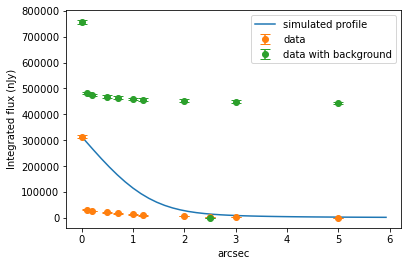

In [16]:
plt.plot(mw, flux, label='simulated profile')
plt.errorbar(mask_width, integrated_flux, yerr, ls='none', label='data', marker='o', capsize=5)
plt.errorbar(xprime, y_w_bkgd, yerr_w_bkgd, ls='none', label='data with background', marker='o', capsize=5)
#plt.ylim([0, 35000])
plt.legend()
plt.xlabel('arcsec')
plt.ylabel('Integrated flux (nJy)');

Text(0.5, 1.0, 'background subtracted for each data point')

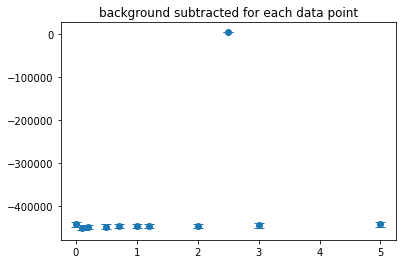

In [17]:
plt.errorbar(mask_width, np.array(integrated_flux)-np.array(y_w_bkgd), yerr_w_bkgd, ls='none', label='data', marker='o', capsize=5)
plt.title('background subtracted for each data point')

#### make a least-square fit to the data

In [18]:
from scipy import optimize
from scipy import interpolate

vonK1arcsec = np.vstack((mw, flux))

In [19]:
def scaleVonKR(vonK1arcsec, r, scaleR, scaleV):

    vR = scaleR * vonK1arcsec[0, :]
    vv = vonK1arcsec[1, :]
    # stepR = vR[1] - vR[0]
    p = np.zeros(len(r))
    if scaleR > 0:
        #print(r) #vR, vv)
        f = interpolate.interp1d(vR, vv, bounds_error=False)
        p = f(r) * scaleV
#        for i in np.arange(len(r)):
#            x1=np.nonzero(vR<r[i])[0][-1]
#            x2=x1+1
#            w1=(vR[x2]-r[i])/stepR
#            w2=(r[i]-vR[x1])/stepR
#            p[i]=vv[x1]*w1+vv[x2]*w2

    #print('scaleR = %7.4f, f0=%7.4f' % (scaleR, p[0]))
    return p

popt, pcov = optimize.curve_fit(
                lambda r, scaleR, scaleV: scaleVonKR(
                    vonK1arcsec, r, scaleR, scaleV),
                mask_width, integrated_flux, p0=[1.5, 1],
                sigma=yerr, absolute_sigma=True)

In [20]:
popt, pcov

(array([0.8433134 , 0.14708078]),
 array([[ 5.62610041e-04, -5.28432798e-05],
        [-5.28432798e-05,  1.10986864e-05]]))

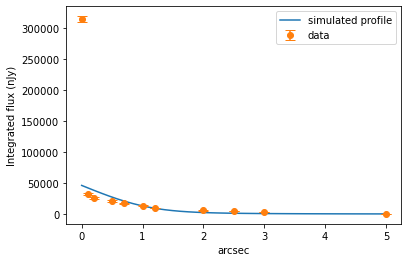

In [21]:
plt.plot(mw*popt[0], flux*popt[1], '-', label='simulated profile')
plt.errorbar(mask_width, integrated_flux, yerr, ls='none', label='data', marker='o', capsize=5)
#plt.ylim([0, 35000])
plt.legend()
plt.xlabel('arcsec')
plt.ylabel('Integrated flux (nJy)');

#### make a least-square fit to the data, excluding the first data point

In [22]:
mask_width=mask_width[1:]
integrated_flux = integrated_flux[1:]
yerr = yerr[1:]
flux = flux/flux[0]*integrated_flux[0]
vonK1arcsec = np.vstack((mw, flux))

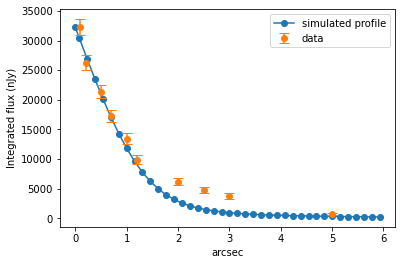

In [23]:
plt.plot(mw, flux, '-o', label='simulated profile')
plt.errorbar(mask_width, integrated_flux, yerr, ls='none', label='data', marker='o', capsize=5)
plt.legend()
plt.xlabel('arcsec')
plt.ylabel('Integrated flux (nJy)');

In [24]:
integrated_flux

[32233.59,
 26272.73,
 21379.66,
 17200.56,
 13452.23,
 9905.22,
 6157.73,
 4793.1,
 3744.37,
 743.19]

In [25]:
popt, pcov = optimize.curve_fit(
                lambda r, scaleR, scaleV: scaleVonKR(
                    vonK1arcsec, r, scaleR, scaleV),
                mask_width, integrated_flux, p0=[1.5, 1],
                sigma=yerr, absolute_sigma=True)

In [26]:
popt, pcov

(array([1.41713217, 0.88711505]),
 array([[ 0.00224648, -0.00079782],
        [-0.00079782,  0.00062396]]))

Text(0, 0.5, 'Integrated flux (nJy)')

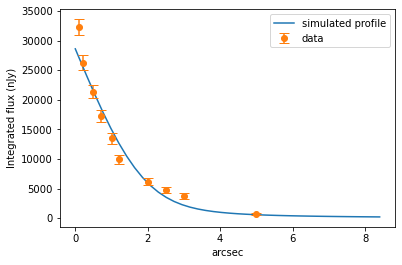

In [27]:
plt.plot(mw*popt[0], flux*popt[1], '-', label='simulated profile')
plt.errorbar(mask_width, integrated_flux, yerr, ls='none', label='data', marker='o', capsize=5)
#plt.ylim([0, 35000])
plt.legend()
#plt.text(0.55, 0.62, "FWHM = %.2f arcsec"%popt[0], color = 'black', transform=fig.transFigure)
plt.xlabel('arcsec')
plt.ylabel('Integrated flux (nJy)')
#plt.grid();

#### make a simple Gaussian with FWHM=0.77", and convince myself that the actual measured flux drops even faster than that.

In [99]:
x0 = np.linspace(-6,6, 1201)
y0 = np.exp(-x0**2/2/(seeing/2.355)**2)

(-1.0, 1.0)

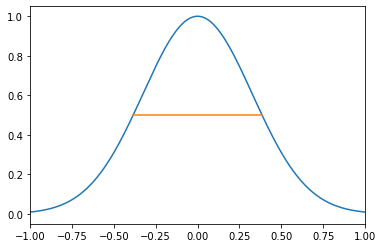

In [100]:
plt.plot(x0,y0)
plt.plot([-seeing/2, seeing/2],[0.5, 0.5], '-')
plt.xlim([-1,1])

In [101]:
total_flux = sum(y0)
use_mask_width = 0.5
print('for a Gaussian of width %.2f arcsec, %.2f %% flux is outside of a mask with width = %.1f arcsec'%(
    seeing, 100*(1-sum(y0[abs(x0)< use_mask_width/2])/total_flux),use_mask_width))

for a Gaussian of width 0.77 arcsec, 45.36 % flux is outside of a mask with width = 0.5 arcsec


In [102]:
print('The data given has %.2f %% outside of a mask with width = %.1f arcsec'%(
    integrated_flux[-2]/integrated_flux[-1]*100, mask_width[-2]))

The data given has 828.55 % outside of a mask with width = 3.0 arcsec
